In [14]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [15]:
# Filter Data Analysts in the U.S.
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') &  
              (df['job_country'] == 'United States')].copy()

# Drop rows where salary_year_avg is missing
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')
df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [16]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'Median_salary'})
df_DA_skills

,skill_count,Median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
vmware,1,147500.0


In [17]:
df_DA_percent = len(df_DA_US)
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / df_DA_percent * 100
df_DA_skills

,skill_count,Median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


In [18]:
skill_percent = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]
df_DA_skills_high_demand

,skill_count,Median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


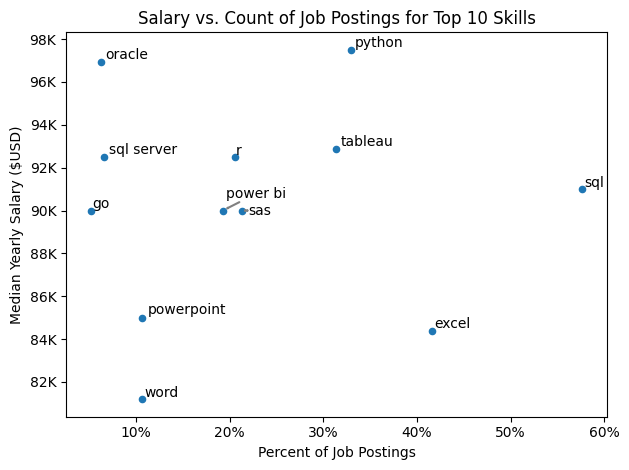

In [29]:
from adjustText import adjust_text



# Use plt.scatter for more flexibility
df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='Median_salary')
#plt.scatter(['skill_count'], df_DA_skills_high_demand['Median_salary'], s=20)

# Add text labels to each point
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], 
                          df_DA_skills_high_demand['Median_salary'].iloc[i], txt))

# Adjust text positions to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

# Labels and title
plt.xlabel('Percent of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()


In [ ]:
df_technology = df['job_type_skills'].copy()

# Remove duplicates and NaN values
df_technology = df_technology.drop_duplicates().dropna()

# Combine all dictionaries into one
technology_dict = {}

for row in df_technology:
    try:
        row_dict = ast.literal_eval(row)  # Convert string to dictionary
        if not isinstance(row_dict, dict):  # Ensure it's a dictionary
            continue
    except (ValueError, SyntaxError):
        continue  # Skip invalid rows

    for key, value in row_dict.items():
        if not isinstance(value, list):  # Ensure value is a list
            value = [value]

        if key in technology_dict:
            technology_dict[key].extend(value)  # Use extend() for lists
        else:
            technology_dict[key] = value

# Remove duplicates from lists
for key in technology_dict:
    technology_dict[key] = list(set(technology_dict[key]))

# Output the cleaned dictionary
print(technology_dict)


{'analyst_tools': ['alteryx', 'cognos', 'ssis', 'outlook', 'sas', 'powerpoint', 'esquisse', 'nuix', 'power bi', 'looker', 'sheets', 'sap', 'sharepoint', 'msaccess', 'spss', 'word', 'visio', 'microstrategy', 'powerbi', 'datarobot', 'qlik', 'dax', 'ms access', 'tableau', 'splunk', 'ssrs', 'excel', 'spreadsheet'], 'programming': ['mongo', 'assembly', 'elixir', 'crystal', 'pascal', 'sas', 't-sql', 'f#', 'c++', 'haskell', 'visual basic', 'groovy', 'objective-c', 'nosql', 'python', 'sass', 'php', 'swift', 'delphi', 'css', 'kotlin', 'cobol', 'vba', 'c', 'clojure', 'c#', 'golang', 'java', 'sql', 'vb.net', 'no-sql', 'powershell', 'typescript', 'visualbasic', 'lua', 'r', 'ocaml', 'erlang', 'perl', 'fortran', 'rust', 'solidity', 'shell', 'ruby', 'bash', 'lisp', 'matlab', 'mongodb', 'julia', 'dart', 'html', 'go', 'scala', 'javascript', 'apl'], 'cloud': ['firebase', 'linode', 'databricks', 'digitalocean', 'ovh', 'heroku', 'aws', 'oracle', 'vmware', 'bigquery', 'gcp', 'openstack', 'snowflake', 'azur

In [31]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,alteryx
0,analyst_tools,cognos
0,analyst_tools,ssis
0,analyst_tools,outlook
0,analyst_tools,sas
...,...,...
9,sync,webex
9,sync,wire
9,sync,twilio
9,sync,slack


In [33]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')
df_plot

,skill_count,Median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


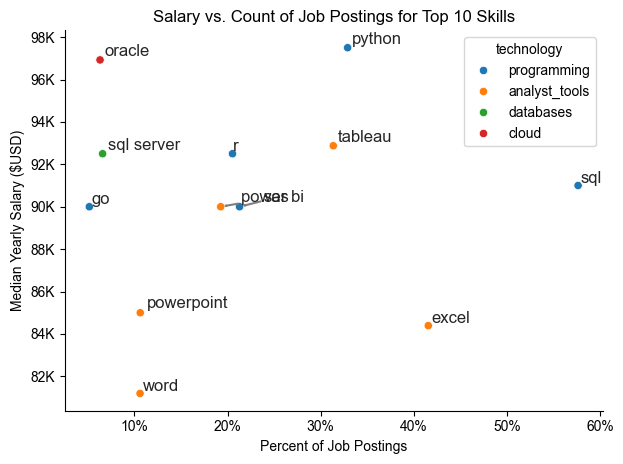

In [ ]:
from adjustText import adjust_text



# Use plt.scatter for more flexibility
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='Median_salary',
    hue='technology'
)
sns.despine()
sns.set_theme(style='darkgrid')

# Add text labels to each point
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], 
                          df_DA_skills_high_demand['Median_salary'].iloc[i], txt))

# Adjust text positions to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

# Labels and title
plt.xlabel('Percent of Job Postings ')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()
